*This script is the first iteration of the Path Generation Module, for our University of Pittsburgh Senior Design Project, the assistive whiteboard robot, for Spring 2023.*

<h1> Path Output to File <h1>

In [1]:
line = ["(0,1)", "(0,2)", "(0,3)" , "(0,4)", "(0,5)", "(0,6)", "(0,7)", "(0,8)"]

with open("Output.txt", "w") as file:
    data = " ".join(line)
    file.write(data)

<h3> For Splicing <h3>

*Adds a comma between each point*

In [2]:
line = ["(0,1)", "(0,2)", "(0,3)" , "(0,4)", "(0,5)", "(0,6)", "(0,7)", "(0,8)"]

with open("Output.csv", "w") as file:
    data = ", ".join(line)
    file.write(data)

*Current Potential Issue: not iterative, need entire path completed*

<h3> For CSV <h3>

*pandas is a library the allows for the creation of a data frame to hold different analytical values. It can easily transfer data from its object structure into a .csv format, which is the easiest file type for the internal modules to read and write coordinates from.*

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
points = [[0,0], [0,1], [0,2], [0,3], [0,4]]
df = pd.DataFrame(columns = ["x", "y"], data = points)
print(df)

   x  y
0  0  0
1  0  1
2  0  2
3  0  3
4  0  4


In [5]:
df.to_csv("Output.csv", index=False)

In [6]:
def PathToFile(file, path):
    df = pd.DataFrame(columns = ["x", "y"], data = path)
    df.to_csv(file, index=False)

In [7]:
PathToFile("Output.csv", df)

<h1> Geometric Shape Path <h1>

*y=mx+b for the basic line drawing function*

def Line(start, end, line):
    start_x = int(start[0])
    start_y = int(start[1])
    
    end_x = int(end[0])
    end_y = int(end[1])
    if(end_x-start_x != 0):
        m = ((end_y-start_y)/(end_x-start_x))
        print("slope:")
        print(m)
    else:
        m = 1
    #(y1-y0) = m(x1-x0)
    #b = m(x1)-m(x0) - (y1-y0)
    b = (-(m)*(start_x) + (start_y))
    print("y-intercept:")
    print(b)
    
    dist = int(((start_x-end_x)**2+(start_y-end_y)**2)**.5)
    
    step = 1
    if(start_x>end_x):
        step = -1
         start = start_x
         end = end_x
    elif(end_x<start_x):
         start = end_x
         end = start_x
        
    for p in range(start_x, end_x+step, step):
        y = m*(p) + b
        print("y:")
        if(-10E-5> y or y<10E-5):
            y=0
        print(y)   
        if(start_x == end_x):
            line.append([start_x, y])
        elif(start_y==end_y):
            line.append([(p), start_y])
        else:
            line.append([(p),y])
            
            
    print(line)
    PathToFile("Output.csv", line)
    
    

In [8]:
def Line2(start, end, line):
    d = dist(start, end)
    step = 0.25
    r = int(d/step)
    
    for i in range(r+1):
        x = start[0] + (end[0]-start[0])*i/r
        y = start[1] + (end[1]-start[1])*i/r
        line.append([round(x,1),round(y,1)])

            
    PathToFile("Output.csv", line)

In [9]:
def Line3(start, end, line):
    
    line.append(start)
    line.append(end)
    print(line)
            
    PathToFile("Output.csv", line)

In [10]:
def dist(start, end):
    dist=pow(pow(start[0]-end[0],2)+pow(start[1]-end[1],2),0.5)
    return dist

<h4>Diagonal Line<h4>

In [11]:
Line3([4,4],[1,0], list())

[[4, 4], [1, 0]]


In [12]:
Line2([1,0],[4,4], list())

<h4>Horizontal Line<h4>

In [13]:
Line2([0,0],[0,4], [])

<h4>Verticle Line<h4>

In [14]:
Line2([4,4],[0,4], [])

<h3> Shapes <h3>

In [15]:
def Triangle(one, two, three, line):
    Line2(one, two, line)
    Line2(two, three, line)
    Line2(three, one, line)
    print(line)

In [16]:
Triangle([0,0],[0,4],[4,3],[])

[[0.0, 0.0], [0.0, 0.2], [0.0, 0.5], [0.0, 0.8], [0.0, 1.0], [0.0, 1.2], [0.0, 1.5], [0.0, 1.8], [0.0, 2.0], [0.0, 2.2], [0.0, 2.5], [0.0, 2.8], [0.0, 3.0], [0.0, 3.2], [0.0, 3.5], [0.0, 3.8], [0.0, 4.0], [0.0, 4.0], [0.2, 3.9], [0.5, 3.9], [0.8, 3.8], [1.0, 3.8], [1.2, 3.7], [1.5, 3.6], [1.8, 3.6], [2.0, 3.5], [2.2, 3.4], [2.5, 3.4], [2.8, 3.3], [3.0, 3.2], [3.2, 3.2], [3.5, 3.1], [3.8, 3.1], [4.0, 3.0], [4.0, 3.0], [3.8, 2.9], [3.6, 2.7], [3.4, 2.5], [3.2, 2.4], [3.0, 2.2], [2.8, 2.1], [2.6, 1.9], [2.4, 1.8], [2.2, 1.6], [2.0, 1.5], [1.8, 1.4], [1.6, 1.2], [1.4, 1.1], [1.2, 0.9], [1.0, 0.8], [0.8, 0.6], [0.6, 0.5], [0.4, 0.3], [0.2, 0.1], [0.0, 0.0]]


In [17]:
def LinearPath(l):
    line = []
    for i in range (0, len(l)-1):
        Line2(l[i], l[i+1], line)
    PathToFile("Output.csv", line)
    print(line)
        
        
    

In [18]:
LinearPath([[0,0],[0,3],[3,3],[3,0]])

[[0.0, 0.0], [0.0, 0.2], [0.0, 0.5], [0.0, 0.8], [0.0, 1.0], [0.0, 1.2], [0.0, 1.5], [0.0, 1.8], [0.0, 2.0], [0.0, 2.2], [0.0, 2.5], [0.0, 2.8], [0.0, 3.0], [0.0, 3.0], [0.2, 3.0], [0.5, 3.0], [0.8, 3.0], [1.0, 3.0], [1.2, 3.0], [1.5, 3.0], [1.8, 3.0], [2.0, 3.0], [2.2, 3.0], [2.5, 3.0], [2.8, 3.0], [3.0, 3.0], [3.0, 3.0], [3.0, 2.8], [3.0, 2.5], [3.0, 2.2], [3.0, 2.0], [3.0, 1.8], [3.0, 1.5], [3.0, 1.2], [3.0, 1.0], [3.0, 0.8], [3.0, 0.5], [3.0, 0.2], [3.0, 0.0]]


In [19]:
import numpy as np

In [20]:
def Circle(r, line): 
    theta = np.linspace( 0 , 2 * np.pi , 360 )
    radius = r
    a = radius * np.cos( theta )
    b = radius * np.sin( theta )
    for i in range(0,len(a)):
        line.append([round(a[i],3),round(b[i],3)])
        plt.scatter(round(a[i],3),round(b[i],3))
    PathToFile("Output.csv", line)
    print(line)

In [21]:
LinearPath([[0,0],[0,3],[3,3],[3,0]])

[[0.0, 0.0], [0.0, 0.2], [0.0, 0.5], [0.0, 0.8], [0.0, 1.0], [0.0, 1.2], [0.0, 1.5], [0.0, 1.8], [0.0, 2.0], [0.0, 2.2], [0.0, 2.5], [0.0, 2.8], [0.0, 3.0], [0.0, 3.0], [0.2, 3.0], [0.5, 3.0], [0.8, 3.0], [1.0, 3.0], [1.2, 3.0], [1.5, 3.0], [1.8, 3.0], [2.0, 3.0], [2.2, 3.0], [2.5, 3.0], [2.8, 3.0], [3.0, 3.0], [3.0, 3.0], [3.0, 2.8], [3.0, 2.5], [3.0, 2.2], [3.0, 2.0], [3.0, 1.8], [3.0, 1.5], [3.0, 1.2], [3.0, 1.0], [3.0, 0.8], [3.0, 0.5], [3.0, 0.2], [3.0, 0.0]]


[[150.0, 0.0], [149.977, 2.625], [149.908, 5.25], [149.793, 7.872], [149.633, 10.493], [149.426, 13.11], [149.174, 15.723], [148.876, 18.331], [148.532, 20.934], [148.143, 23.53], [147.708, 26.119], [147.229, 28.7], [146.704, 31.272], [146.134, 33.835], [145.52, 36.387], [144.861, 38.929], [144.157, 41.458], [143.409, 43.974], [142.618, 46.477], [141.783, 48.966], [140.904, 51.44], [139.982, 53.898], [139.017, 56.34], [138.01, 58.764], [136.961, 61.17], [135.869, 63.558], [134.736, 65.926], [133.561, 68.274], [132.346, 70.601], [131.09, 72.906], [129.794, 75.189], [128.459, 77.449], [127.083, 79.686], [125.669, 81.898], [124.217, 84.084], [122.726, 86.245], [121.198, 88.38], [119.633, 90.488], [118.031, 92.567], [116.393, 94.619], [114.719, 96.641], [113.01, 98.634], [111.267, 100.597], [109.489, 102.529], [107.678, 104.429], [105.834, 106.298], [103.957, 108.134], [102.049, 109.937], [100.109, 111.706], [98.139, 113.441], [96.139, 115.141], [94.109, 116.806], [92.05, 118.435], [89.963

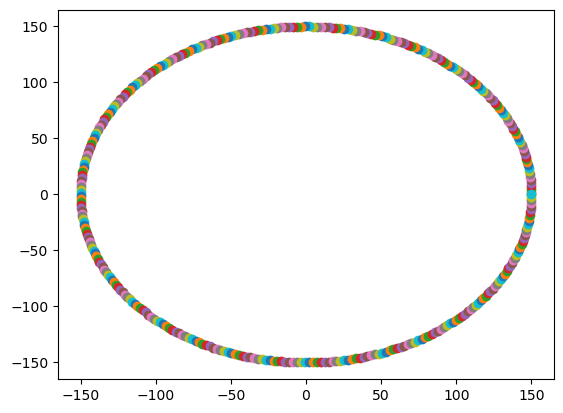

In [22]:
Circle(150, [])

<h1> Edge Detection <h1>

In [23]:
import cv2
import os
from matplotlib import pyplot as plt

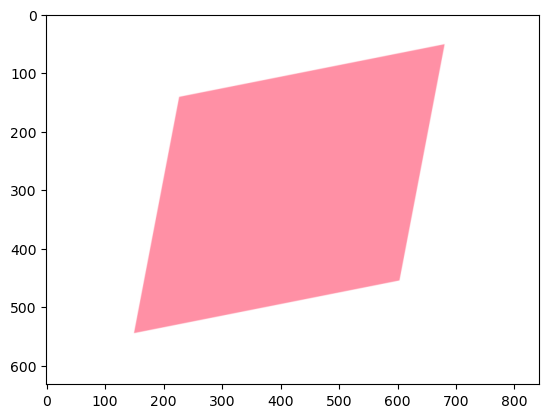

In [24]:
image_path = os.path.join('Pictures','rhombus.png')
img = cv2.imread(image_path)
plt.imshow(img)

<h3>Noise Reduction<h3>

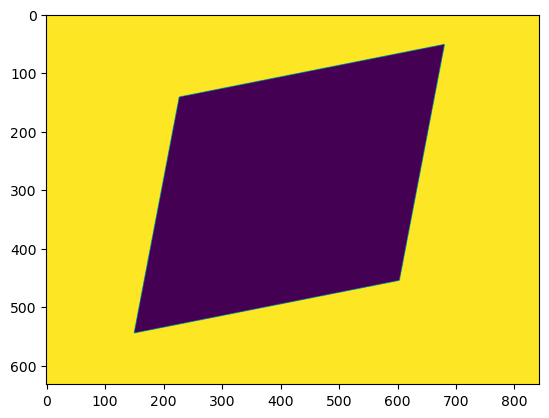

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
blur = cv2.GaussianBlur(gray, (5,5), 0)

<h3>Convolution filters<h3>

In [26]:
canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)

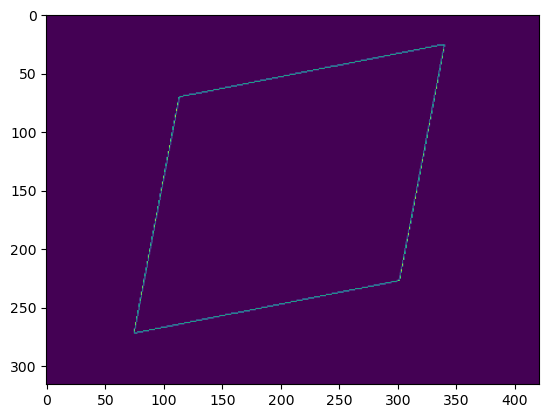

In [27]:
resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('Frame View', resize_image)
plt.imshow(resize_image)

<h1> Feature Detection <h1>

In [28]:
corners= cv2.goodFeaturesToTrack(gray, 100, 0.01, 50)
print(corners)

[[[680.  52.]]

 [[151. 544.]]

 [[603. 454.]]

 [[228. 142.]]]


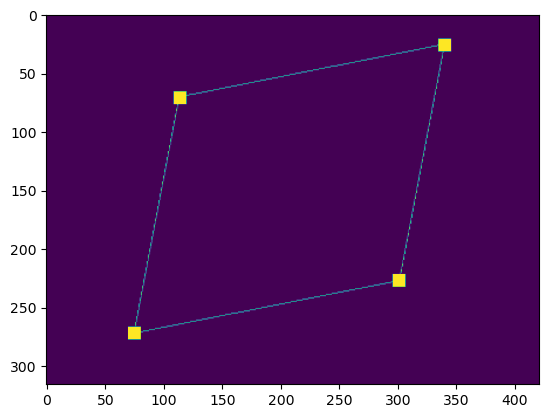

In [29]:
x_min = 100000
y_max = 0
for corner in corners:
    x,y= corner[0]
    x= int((x)/2)
    y= int((y)/2)
    cv2.rectangle(resize_image, (x-5,y-5),(x+5,y+5),(255,0,0),-1)

    
plt.imshow(resize_image)

<h1> Feature Detection - Curves<h1>

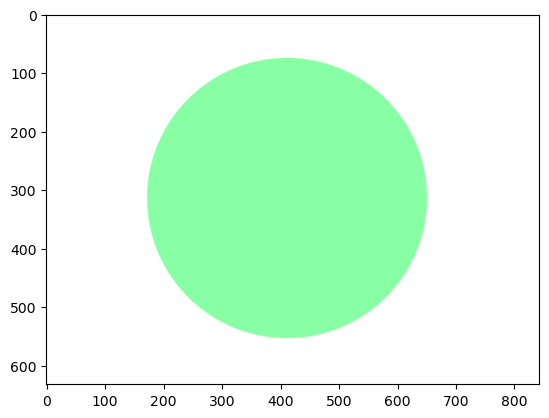

In [30]:
image_path = os.path.join('circle2.png')
img = cv2.imread(image_path)
plt.imshow(img)

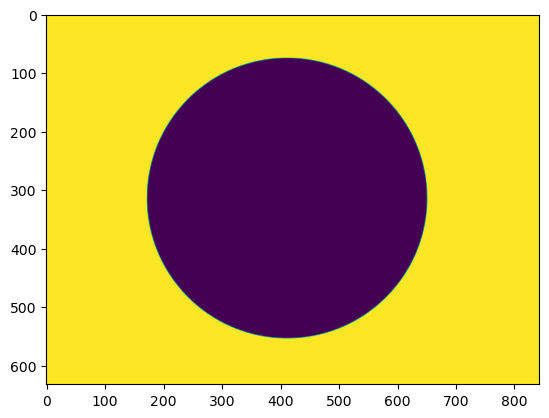

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
blur = cv2.GaussianBlur(gray, (5,5), 0)

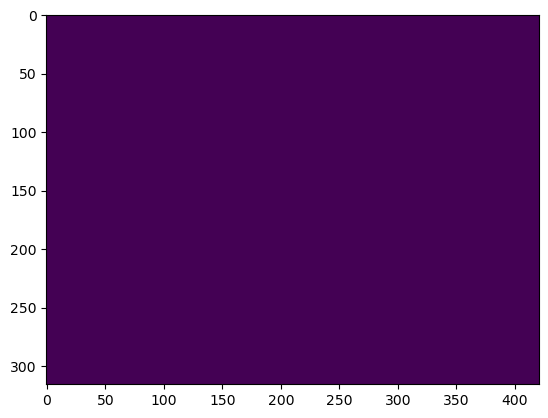

In [32]:
canny = cv2.Canny(blur, threshold1 = 180, threshold2 = 200)
resize_image = cv2.resize(canny, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2.imshow('Frame View', resize_image)
plt.imshow(resize_image)

[[[177. 268.]]

 [[643. 253.]]

 [[472. 545.]]

 [[638. 236.]]

 [[339.  86.]]

 [[351. 545.]]

 [[358.  81.]]

 [[466.  81.]]

 [[643. 374.]]

 [[376. 550.]]

 [[461.  80.]]

 [[183. 384.]]

 [[641. 241.]]

 [[177. 359.]]

 [[334. 540.]]

 [[274. 118.]]

 [[648. 278.]]

 [[635. 225.]]

 [[499.  92.]]

 [[648. 350.]]

 [[188. 230.]]

 [[291. 108.]]

 [[290. 521.]]

 [[600. 166.]]

 [[448. 550.]]

 [[363.  79.]]

 [[300. 103.]]

 [[178. 364.]]

 [[487. 542.]]

 [[629. 416.]]

 [[189. 401.]]

 [[626. 209.]]

 [[638. 391.]]

 [[183. 245.]]

 [[317. 533.]]

 [[484.  86.]]

 [[621. 199.]]

 [[509.  94.]]

 [[178. 263.]]

 [[199. 205.]]

 [[524. 526.]]

 [[280. 513.]]

 [[201. 198.]]

 [[505. 533.]]

 [[207. 188.]]

 [[650. 341.]]

 [[649. 284.]]

 [[306.  99.]]

 [[605. 454.]]

 [[382. 551.]]

 [[200. 424.]]

 [[325.  91.]]

 [[323. 537.]]

 [[632. 406.]]

 [[501. 537.]]

 [[191. 409.]]

 [[218. 454.]]

 [[517. 528.]]

 [[248. 140.]]

 [[205. 433.]]

 [[218. 172.]]

 [[175. 274.]]

 [[370. 

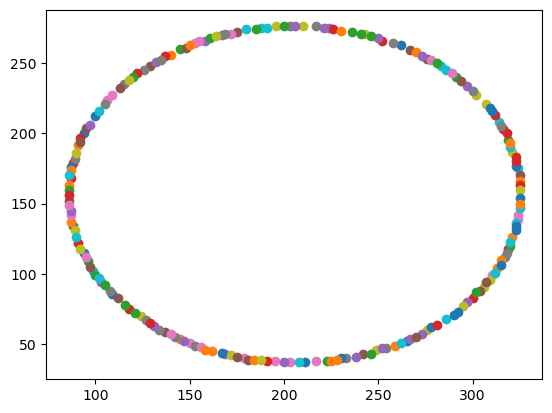

In [33]:
corners= cv2.goodFeaturesToTrack(gray, 500, 0.00001, 5)
print(corners)

for corner in corners:
    x,y= corner[0]
    x= int((x)/2)
    y= int((y)/2)
    cv2.rectangle(resize_image, (x-5,y-5),(x+5,y+5),(255,0,0),-1)
    plt.scatter(round(x,3),round(y,3))
    
print(resize_image)

<h1>Starting Point<h1>

In [34]:
# min_x = 100000
# min_x_y = 0
# max_y = 0
# max_y_x = 0;

In [35]:
# def LocateStart(x, y):
#     if(x < mix_x):
#         min_x = x
#         min_x_y = y
#     if(y < max_y):
#         max_y = y
#         max_y_x = x

In [37]:
def StartPoint(corners):
    x_min = 100000
    y_max = 0
    for corner in corners:
        x,y= corner[0]
        x= int((x)/2)
        y= int((y)/2)
    
    #START POINT LOCATER
    
        if(x<x_min):
            x_min = x
        if(y>y_max):
            y_max = y
        
    #END START POINT LOCATION
    
        cv2.rectangle(resize_image, (x-5,y-5),(x+5,y+5),(255,0,0),-1)
    print(x_min)
    print(y_max)

In [38]:
StartPoint(corners)

86
276
